Problem Statement:


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
#import function to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
df = pd.read_csv("day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape


(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


EXPLORATORY DATA ANALYSIS

In [8]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in dataset so we move to the next step: dropping the columns that are unnecessary. 
columns 'casual' and 'registered' are already referred to in the column 'cnt' so its better to drop them.

In [9]:
df.drop(['instant'],axis=1, inplace=True)
df.drop(['casual'],axis=1, inplace=True)
df.drop(['registered'],axis=1, inplace=True)

In [10]:
#converting into datetime object and extracting the day
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y', errors='coerce')
df['d_day'] = df['dteday'].dt.dayofyear

#we can drop the dteday column as its values are already present in d_day, month, and year.

In [11]:
df.drop(['dteday'], axis=1, inplace=True)

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,d_day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


converting some variables to categorical based on data dictionary.

In [13]:
CATEGORICAL_COLUMNS = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

category_dict = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: '2018', 1: '2019'},
    'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday': {0: 'Working Day', 1: 'Not Working Day'},
    'weathersit': {1: 'Mild', 
                   2: 'Moderate',
                   3: 'Extremely Moderate',
                   4:  'Heavy'}
}

for col in category_dict:
    df[col] = df[col].map(category_dict[col])


In [14]:
df.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
d_day           int32
dtype: object

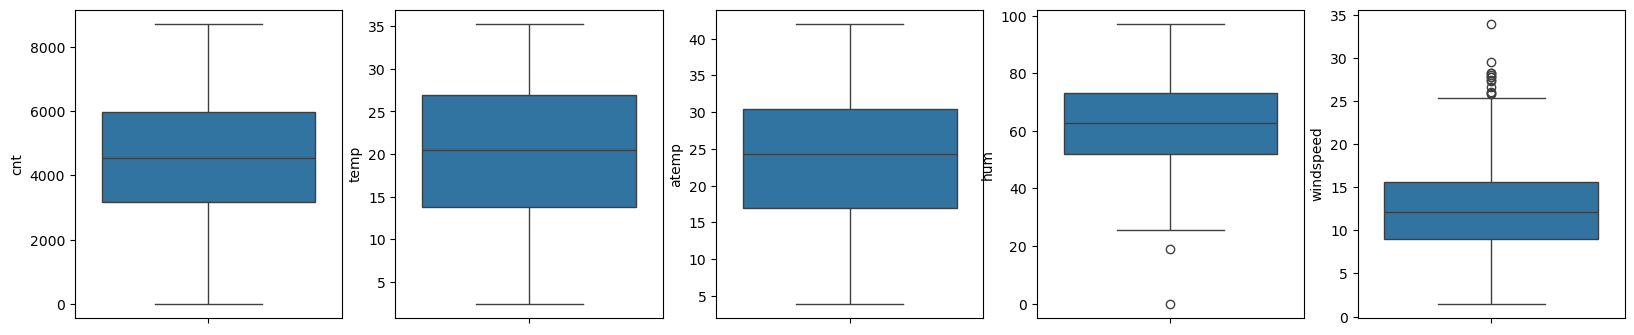

In [15]:
# drawing boxplot to check for outliers
coln = ['cnt','temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in coln:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    i+=1

we can observe that columns humidity and windspeed have some outliers but they aren't very extreme so its okay to leave them be.

We can draw pairplot for numerical values and see how it relates to the target variable 'cnt'

<Figure size 1500x3000 with 0 Axes>

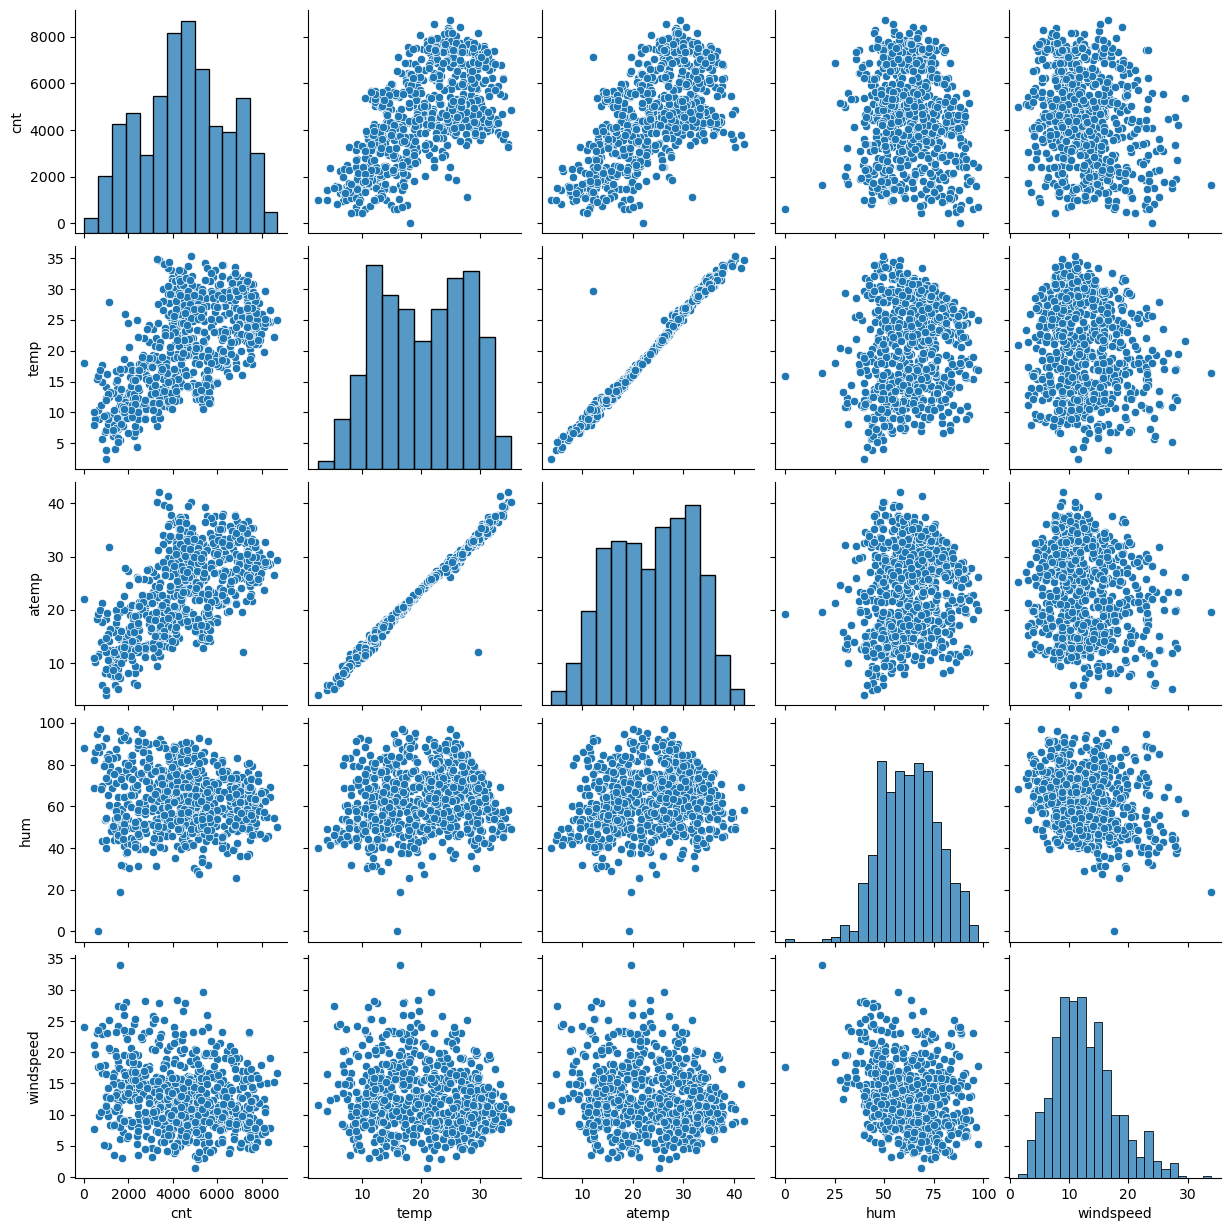

In [16]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

we can observe that the target variable cnt is highly correlated to variables temp and atemp.

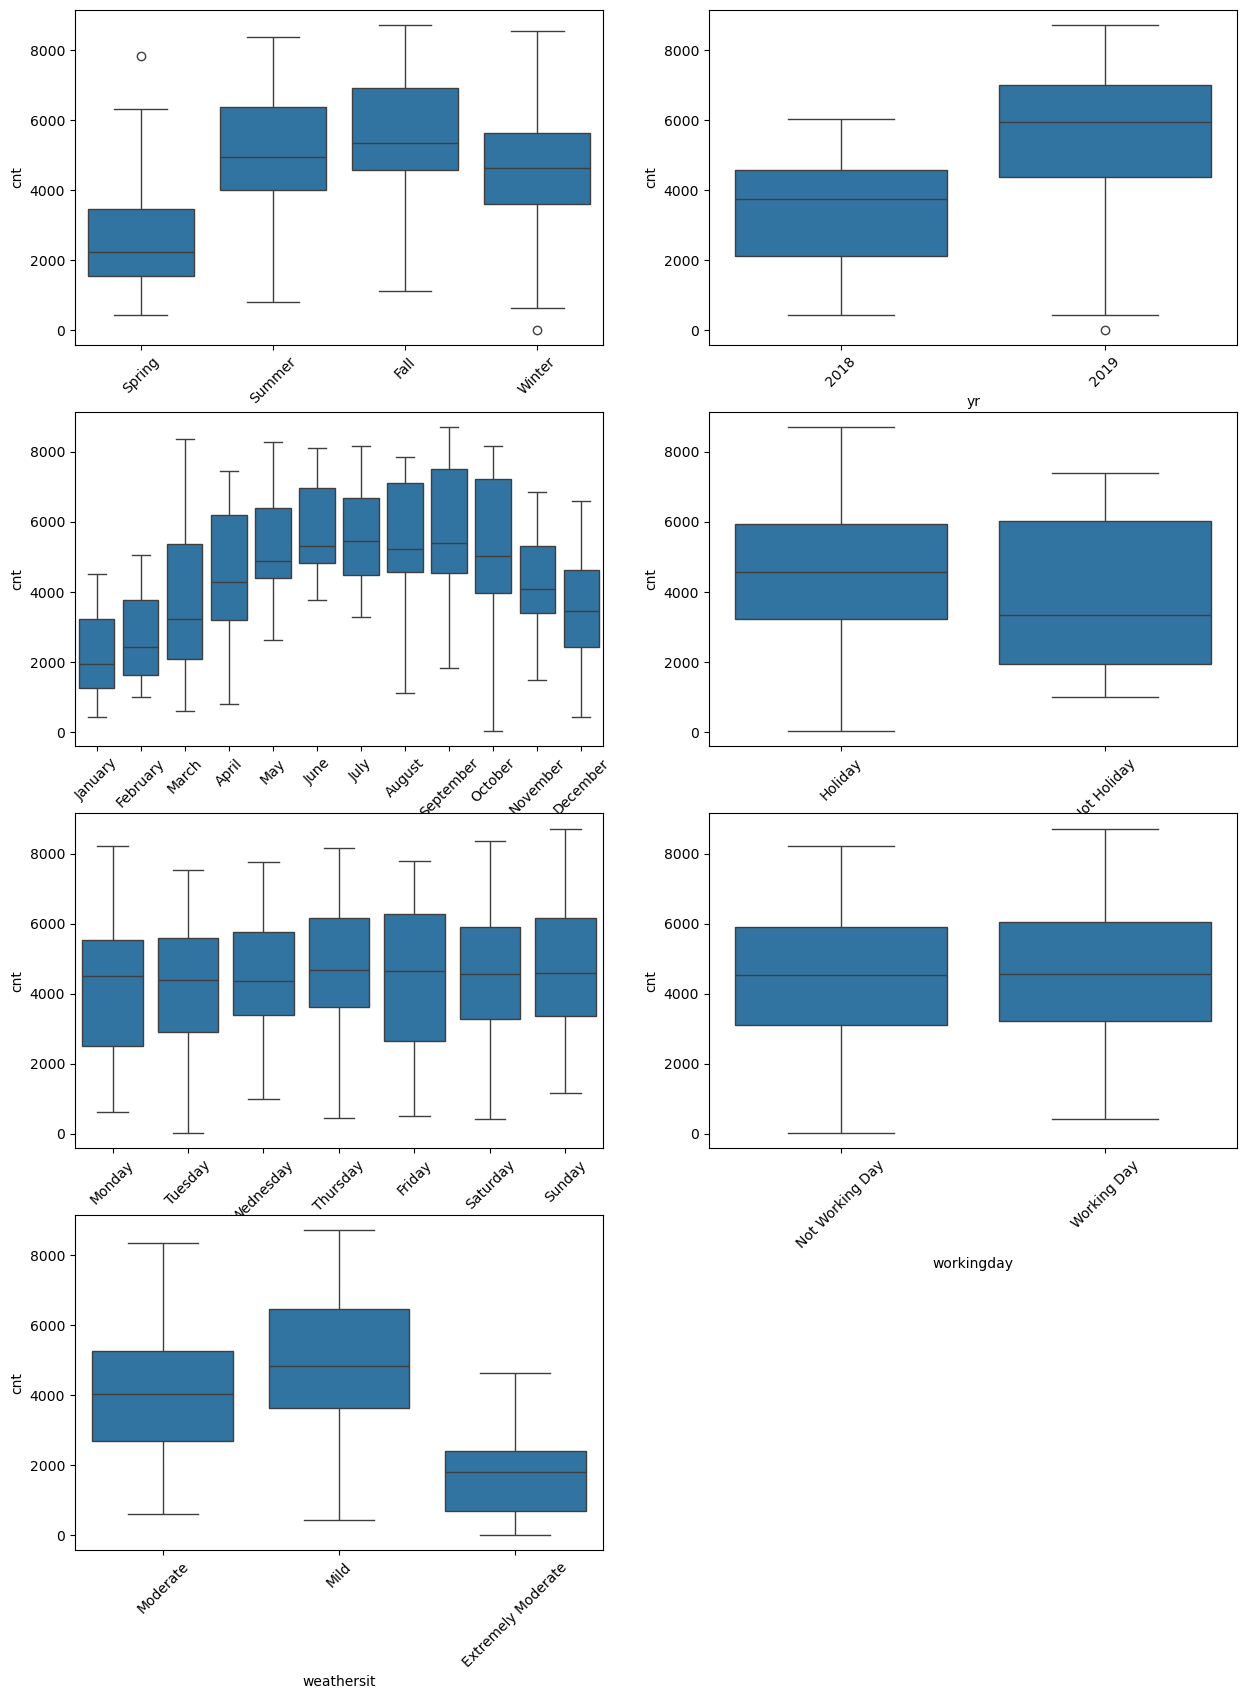

In [17]:
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 20))
for i in enumerate(cat_var):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
    plt.xticks(rotation=45)
plt.show()


From the above boxplots, we can observe that:
1. The demand of rental bikes is highest during fall.
2. The demand has grown from year 2018 to 2019.
3. The demand continues to grow from January until September and then starts decreasing after that, possibly due to growing cold weather conditions.
4. As observed by the median value, the demand during holiday is higher compared to non-holiday.
5. The rental bike is higher in demand during clear, few clouds, and partly cloudy days. 


CREATING DUMMY VARIABLES

In [18]:

columns_to_dummies = ['season','yr','holiday','mnth','weekday','workingday']
df = pd.get_dummies(data=df, columns=columns_to_dummies, drop_first=True, dtype ='int')
df=pd.get_dummies(data=df, columns=['weathersit'], dtype='int')



we are doing weathersit seperately because its encoding Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog isnt present anywhere in column hence if we were to drop one column off the remaining 3, it can cause discrepancies in understanding. 

In [19]:
df.head()

,temp,atemp,hum,windspeed,cnt,d_day,season_Spring,season_Summer,season_Winter,yr_2019,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working Day,weathersit_Extremely Moderate,weathersit_Mild,weathersit_Moderate
0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'd_day', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'holiday_Not Holiday',
       'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_Working Day',
       'weathersit_Extremely Moderate', 'weathersit_Mild',
       'weathersit_Moderate'],
      dtype='object')

SPLITTING INTO TRAINING AND TESTING SET

In [21]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In the next step, we will perform rescaling to ensure that variables have comparable scale, for better model evaluation.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','d_day', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,d_day,season_Spring,season_Summer,season_Winter,yr_2019,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working Day,weathersit_Extremely Moderate,weathersit_Mild,weathersit_Moderate
653,0.509887,0.501133,0.575354,0.300794,0.864243,0.791209,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0.579670,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,0.167582,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,0.997253,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0.321429,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


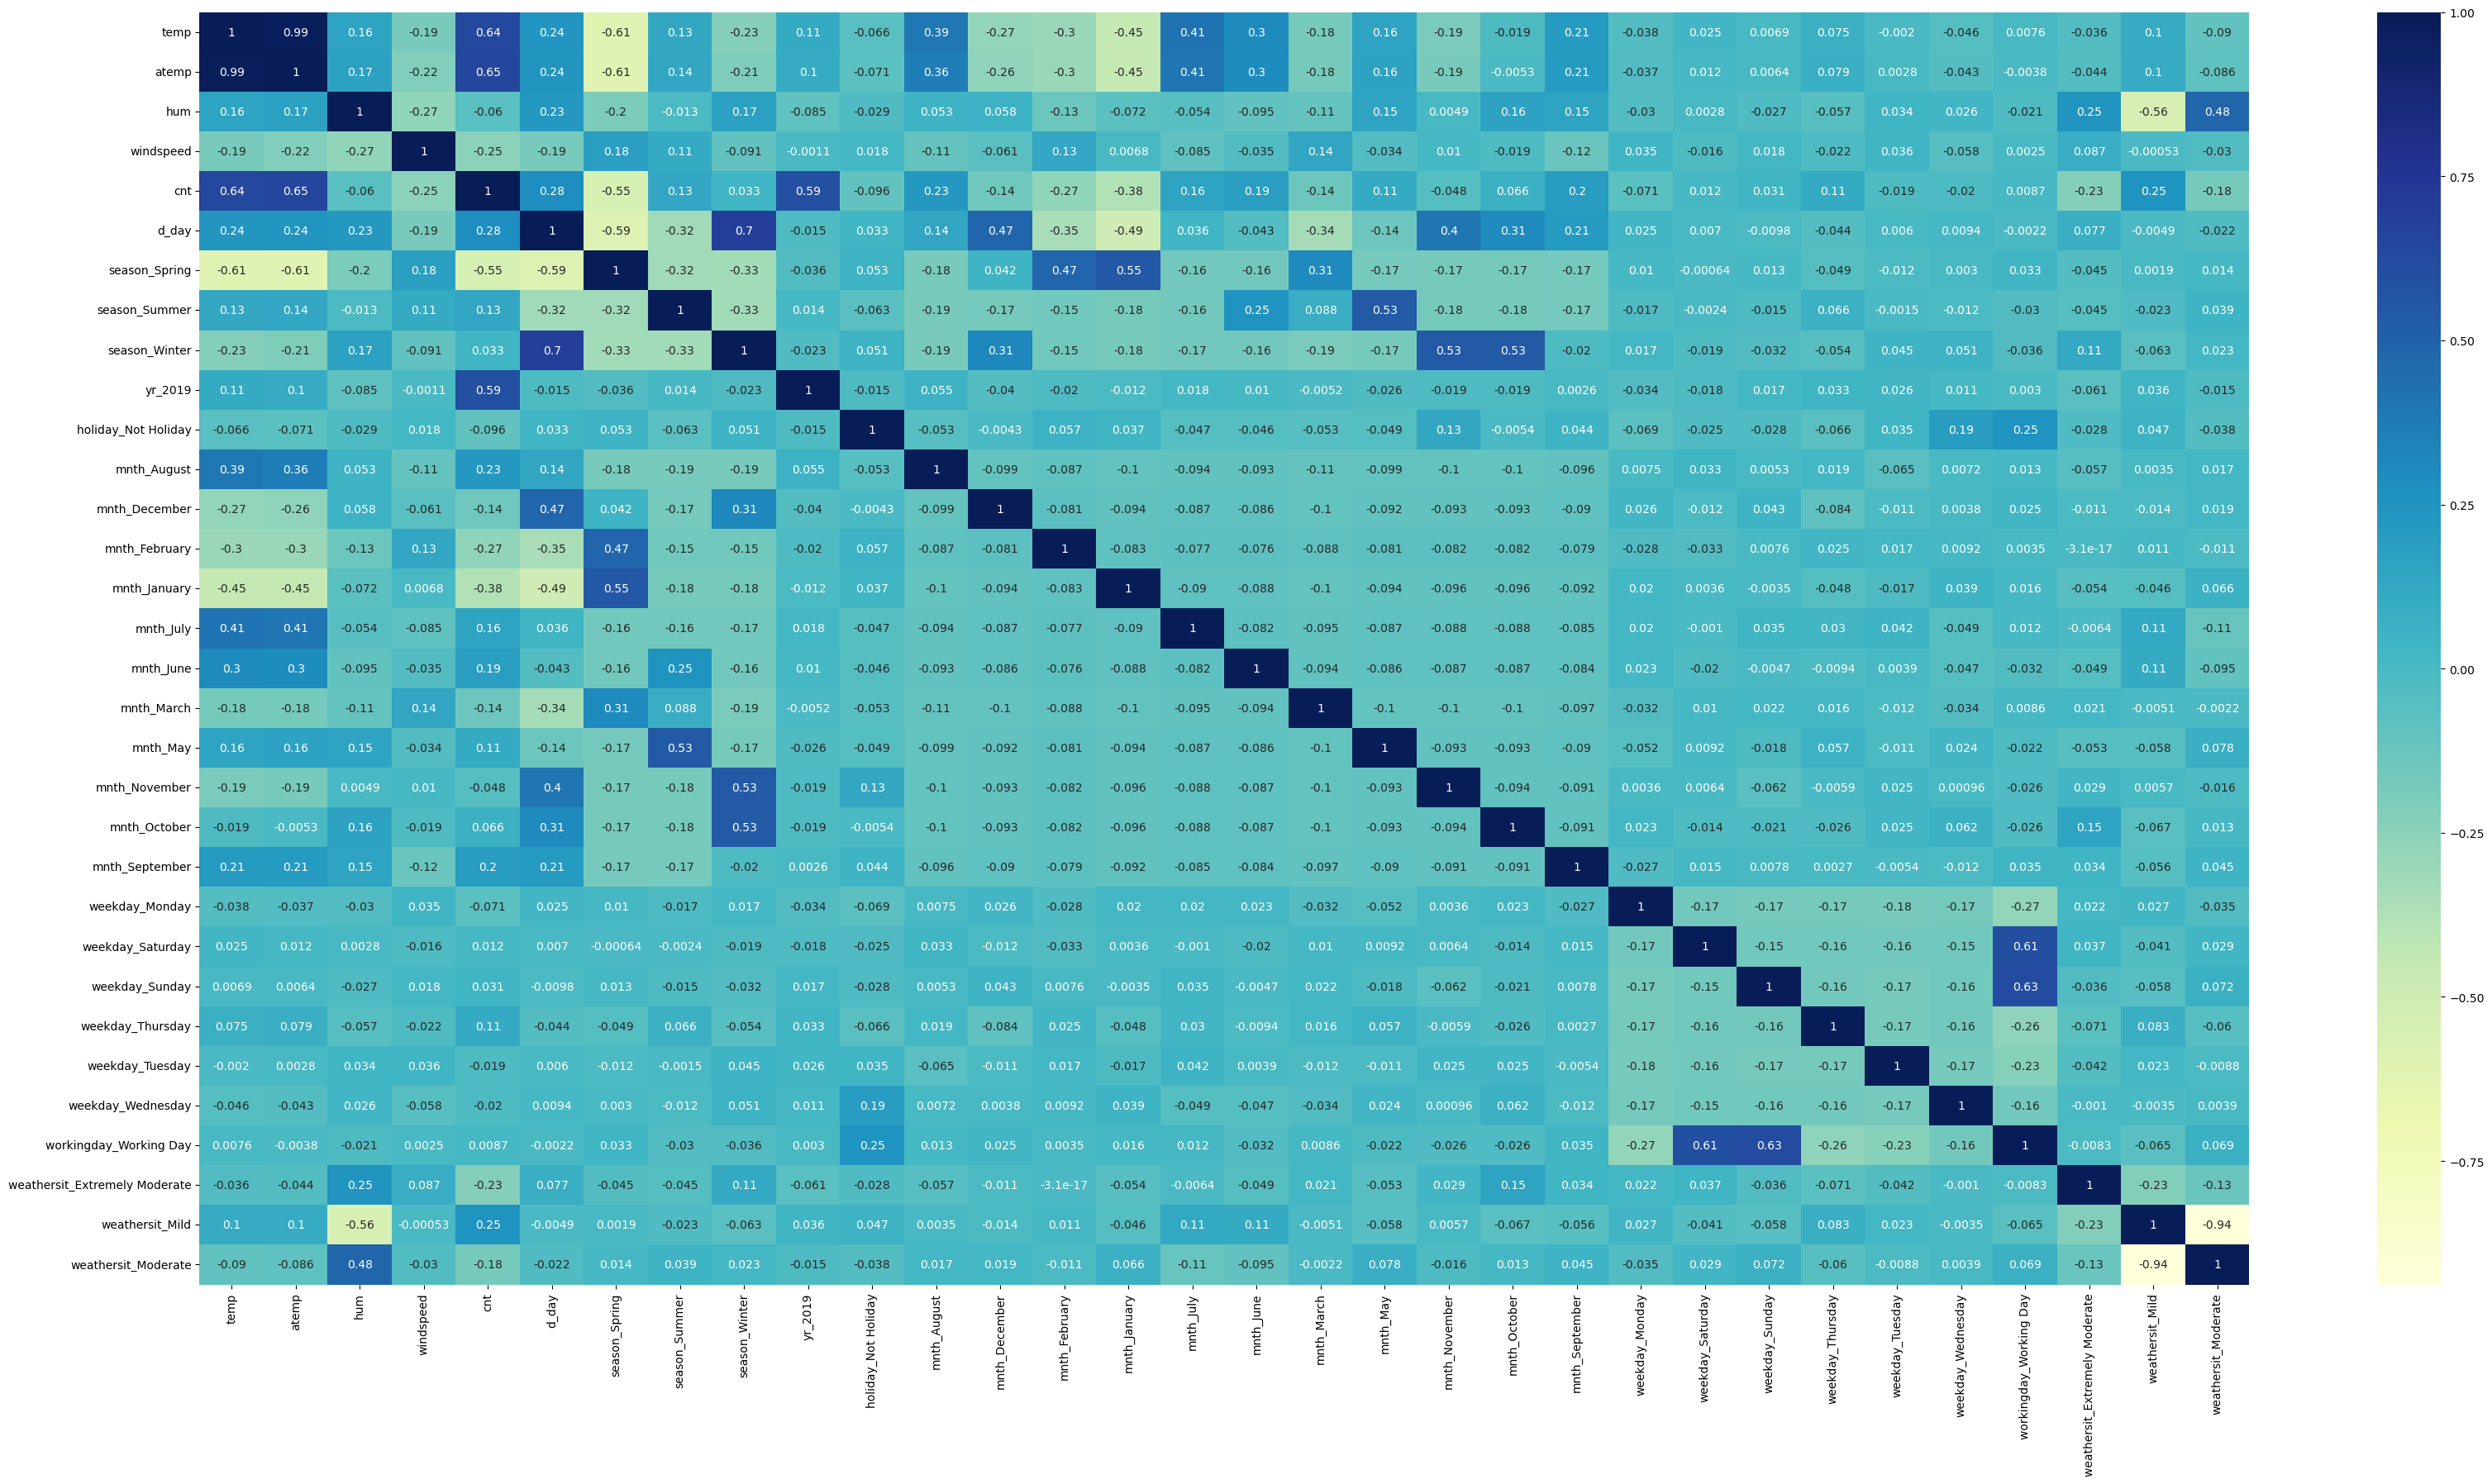

In [26]:
#Finding which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can observe that cnt is highly corelated with atemp and temp variables followed by year 2019.

MODEL BUILDING


In [27]:

# Spitting the target variable
y_train = df_train.pop('cnt')
X_train = df_train


We will use the Recursive feature elimination then continue building our model from there.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('d_day', False, 14),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('holiday_Not Holiday', True, 1),
 ('mnth_August', False, 11),
 ('mnth_December', False, 2),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 17),
 ('mnth_May', False, 8),
 ('mnth_November', True, 1),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('workingday_Working Day', False, 4),
 ('weathersit_Extremely Moderate', True, 1),
 ('weathersit_Mild', True, 1),
 ('weathersit_Moderate', True, 1)]

displaying the columns which were selected

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'holiday_Not Holiday', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_Extremely Moderate', 'weathersit_Mild',
       'weathersit_Moderate'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['atemp', 'd_day', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Working Day'],
      dtype='object')

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# creating a function for the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_calculate(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Model 1

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_rfe)

In [36]:

#Building the model using statsmodel.api for detailed statistics

lm1 = sm.OLS(y_train,X_train_1).fit()  
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          2.25e-189
Time:                        14:25:37   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [37]:
VIF_calculate(X_train_rfe)

,Features,VIF
13,weathersit_Mild,49.16
14,weathersit_Moderate,32.33
3,season_Spring,5.20
12,weathersit_Extremely Moderate,4.16
0,temp,3.97
5,season_Winter,3.77
4,season_Summer,2.67
1,hum,1.91
8,mnth_January,1.57
9,mnth_July,1.49


weathersit_Mild has highest VIF so we should drop it first. 

In [38]:
X_train_new = X_train_rfe.drop(['weathersit_Mild'], axis = 1)



In [39]:
VIF_calculate(X_train_new)

,Features,VIF
1,hum,29.12
0,temp,16.80
2,windspeed,4.71
3,season_Spring,4.37
5,season_Winter,3.78
4,season_Summer,2.79
13,weathersit_Moderate,2.29
6,yr_2019,2.09
8,mnth_January,1.67
9,mnth_July,1.59


we can observe that variable hum have significantly high VIF so we drop it next. 

In [40]:
X_train_new1 = X_train_new.drop(['hum'], axis = 1)
VIF_calculate(X_train_new1)

,Features,VIF
0,temp,5.15
1,windspeed,4.67
2,season_Spring,2.76
4,season_Winter,2.29
3,season_Summer,2.23
5,yr_2019,2.07
7,mnth_January,1.61
8,mnth_July,1.59
9,mnth_November,1.59
12,weathersit_Moderate,1.56


VIF values seem good enough now so we proceed with new model.

Model 2

In [41]:
X_train_2 = sm.add_constant(X_train_new1)
lr_2 = sm.OLS(y_train,X_train_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          2.54e-186
Time:                        14:25:38   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

we can drop the mth_January variable as it has high p value and calculate VIF again.

In [42]:
X_train_new2 = X_train_new1.drop(['mnth_November'], axis = 1)
VIF_calculate(X_train_new2)

,Features,VIF
0,temp,5.13
1,windspeed,4.61
2,season_Spring,2.75
3,season_Summer,2.22
5,yr_2019,2.07
4,season_Winter,1.79
7,mnth_January,1.61
8,mnth_July,1.59
11,weathersit_Moderate,1.56
9,mnth_September,1.34


VIF seems ok so we will again build a new model.

Model 3

In [43]:

X_train_3 = sm.add_constant(X_train_new2)
lr_3 = sm.OLS(y_train,X_train_3).fit()
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          3.97e-187
Time:                        14:25:38   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

mnth_January has high p value so we drop it first then move on to calculate VIF again.

In [44]:

X_train_new3 = X_train_new2.drop(['mnth_January'], axis = 1)
VIF_calculate(X_train_new3)


,Features,VIF
0,temp,5.09
1,windspeed,4.60
3,season_Summer,2.21
2,season_Spring,2.08
5,yr_2019,2.07
4,season_Winter,1.79
7,mnth_July,1.58
10,weathersit_Moderate,1.55
8,mnth_September,1.34
9,weathersit_Extremely Moderate,1.08


VIF is ok so we build a new model again.

Model 4

In [45]:

X_train_4 = sm.add_constant(X_train_new3)
lr_4 = sm.OLS(y_train,X_train_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          2.40e-187
Time:                        14:25:38   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [46]:
#droppinh mth_July due to its high p value
X_train_new4 = X_train_new3.drop(['mnth_July'], axis = 1)
VIF_calculate(X_train_new4)


,Features,VIF
1,windspeed,4.59
0,temp,3.84
5,yr_2019,2.07
2,season_Spring,1.99
3,season_Summer,1.89
4,season_Winter,1.63
9,weathersit_Moderate,1.54
7,mnth_September,1.23
8,weathersit_Extremely Moderate,1.08
6,holiday_Not Holiday,1.04


Model 5

In [47]:

X_train_5 = sm.add_constant(X_train_new4)
lr_5 = sm.OLS(y_train,X_train_5).fit()
print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          7.36e-187
Time:                        14:25:38   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Model 5 have low VIF values as well as low p values mostly so we will keep it. (p value for mnth_spring is slightly more but after checking both models, dropping it seems to reduce performance of model on train and test so decided to keep it, plus from business perspective it has good corelation with target variable and can be useful.)

RESIDUAL ANALYSIS OF THE TRAIN DATA

In [50]:
y_train_cnt = lr_5.predict(X_train_5)

Text(0.5, 0, 'Errors')

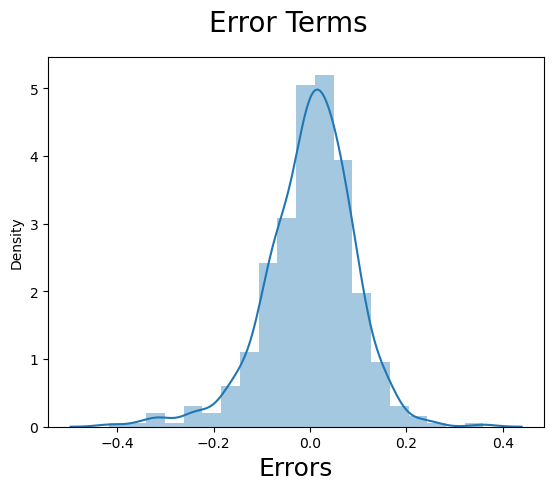

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

We can see that error terms follow a normal distribution.

MAKING PREDICTIONS ON TEST MODEL

In [52]:
num_vars = ['temp','atemp','hum','windspeed','d_day', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
colum = X_train_new4.columns

X_test = X_test[colum]

X_test_5 = sm.add_constant(X_test)

In [55]:
y_pred = lr_5.predict(X_test_5)

Text(0, 0.5, 'y_pred')

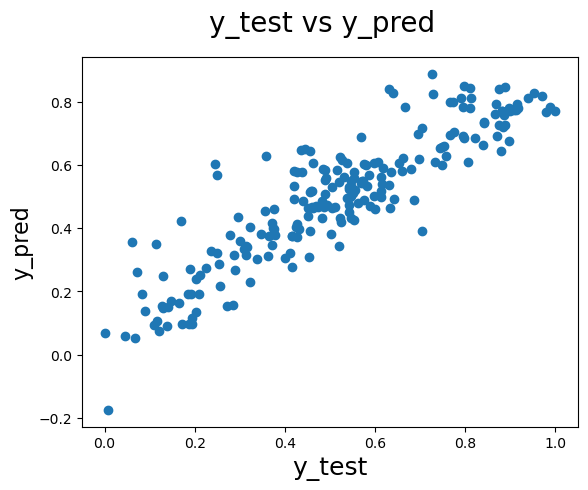

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)     

In [64]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)

0.7942494090079091


In [65]:

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
r2=print(adjusted_r2)

0.7844


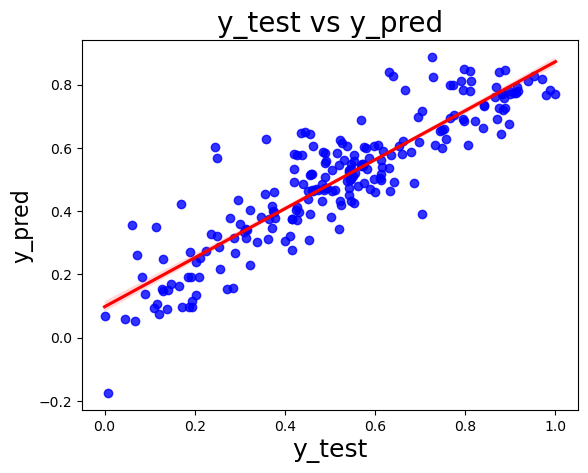

In [66]:

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

INFERENCES:


The features influencing bike rental daily counts most significantly in our model are are temp, windspeed, season_Spring, season_Summer, season_Winter, yr_2019, holiday_Not Holiday, mnth, weathersit_Extremely Moderate, and weathersit_Moderate

1. The bike rental daily count count is higher in 2019 compared to 2018.
2. The demand for bike rental grows from Summer to Fall then decreases in the winter.
3. The count of bike rental is highest during clear weather conditions (clear, Few clouds, Partly cloudy, Partly cloudy) whereas low in moderate and extremely moderate conditions.
4. Some outliers are present in humidity and windspeed variables but they do not affect the distribution as much.
5. The R-squared  for our model is 0.833 which means that means that 83.3% of the variance in the target variable is explained by the independent variables in our model.

